In [1]:
import pandas as pd


In [2]:
train_data = pd.read_csv('credit.data/creditdefault_train.csv')
test_data = pd.read_csv('credit.data/creditdefault_test.csv')


In [3]:
train_data


,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,0,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
2,0,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
3,0,50000,1,1,2,37,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
4,0,500000,1,1,2,29,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,100000,1,1,2,38,0,-1,-1,0,...,102996,70626,69473,55004,2000,111784,4000,3000,2000,2000
14996,0,220000,1,3,1,39,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
14997,0,150000,1,3,2,43,-1,-1,-1,-1,...,3502,8979,5190,0,1837,3526,8998,129,0,0
14998,1,30000,1,2,2,37,4,3,2,-1,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100


In [4]:
test_data


,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
1,0,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
2,0,140000,2,3,1,28,0,0,2,0,...,12108,12211,11793,3719,3329,0,432,1000,1000,1000
3,0,20000,1,3,2,35,-2,-2,-2,-2,...,0,0,13007,13912,0,0,0,13007,1122,0
4,0,200000,2,3,2,34,0,0,2,0,...,5535,2513,1828,3731,2306,12,50,300,3738,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,150000,1,1,2,35,-1,-1,-1,-1,...,-3,780,0,0,9054,0,783,0,0,0
14996,0,140000,1,2,1,41,0,0,0,0,...,139110,138262,49675,46121,6000,7000,4228,1505,2000,2000
14997,0,10000,1,3,1,43,0,0,0,-2,...,0,0,0,0,2000,0,0,0,0,0
14998,1,80000,1,2,2,34,2,2,2,2,...,79384,77519,82607,81158,7000,3500,0,7000,0,4000


In [5]:
y_train = train_data['Y'].values
X_train = train_data.drop(['Y'],axis=1).values

y_test = test_data['Y'].values
X_test = test_data.drop(['Y'],axis=1).values

In [6]:
X_train[0]

array([20000,     2,     2,     1,    24,     2,     2,    -1,    -1,
          -2,    -2,  3913,  3102,   689,     0,     0,     0,     0,
         689,     0,     0,     0,     0], dtype=int64)

## Scaling the data

In [7]:
from sklearn import preprocessing

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [8]:
X_train[0]

array([-1.13331216,  0.8082431 ,  0.19067968, -1.06403915, -1.24187957,
        1.79595421,  1.77813178, -0.69601185, -0.66540266, -1.51753654,
       -1.48040468, -0.64832639, -0.64983325, -0.6711257 , -0.67292975,
       -0.66565359, -0.65374752, -0.36112736, -0.23812634, -0.36269067,
       -0.30289045, -0.31031133, -0.28876454])

## Decision Tree (Gosia)

In [9]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV

clf = tree.DecisionTreeClassifier()

parameters = {
    'max_depth':range(2,20), 
    'criterion':['gini', 'entropy'],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(estimator = clf, param_grid = parameters, scoring = 'accuracy' , cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

best_tree_model = grid.best_estimator_

scores = grid.cv_results_
print ('best accuracy : ', grid.best_score_, ', best parameters : ',  grid.best_params_) 

best accuracy :  0.8163333333333332 , best parameters :  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2'}


In [10]:
gini = {
    'sqrt':{
        'max_depth' : [],
        'max_features' : [],
        'mean_test_score': []   
    },
    
    'log2':{
        'max_depth' : [],
        'max_features' : [],
        'mean_test_score': []      
    }
    
}

entropy = {
    'sqrt':{
        'max_depth' : [],
        'max_features' : [],
        'mean_test_score': []   
    },
    
    'log2':{
        'max_depth' : [],
        'max_features' : [],
        'mean_test_score': []      
    }
    
}

In [11]:
for i in scores['params'][:]:
    
    index = scores['params'].index(i)
    
    if(i['criterion'] == 'gini'):
        
        if(i['max_features'] == 'sqrt'):
            
            gini['sqrt']['max_depth'].append(i['max_depth'])
            gini['sqrt']['mean_test_score'].append(scores['mean_test_score'][index])
        else:
            gini['log2']['max_depth'].append(i['max_depth'])
            gini['log2']['mean_test_score'].append(scores['mean_test_score'][index])    
        
    else:
        if(i['max_features'] == 'sqrt'):
            
            entropy['sqrt']['max_depth'].append(i['max_depth'])
            entropy['sqrt']['mean_test_score'].append(scores['mean_test_score'][index])
        else:
            entropy['log2']['max_depth'].append(i['max_depth'])
            entropy['log2']['mean_test_score'].append(scores['mean_test_score'][index]) 

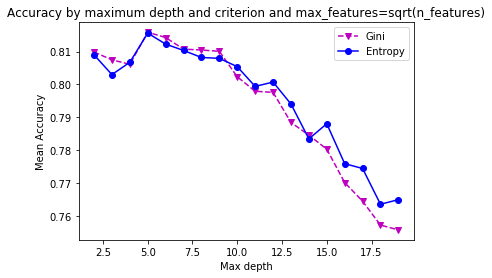

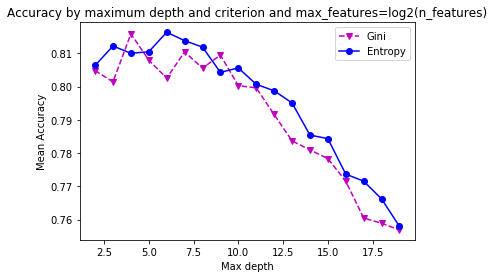

In [12]:
import matplotlib.pyplot as plt


plt.plot(gini['sqrt']['max_depth'], gini['sqrt']['mean_test_score'], 'mv--')
plt.plot(entropy['sqrt']['max_depth'], entropy['sqrt']['mean_test_score'],'bo-')
plt.title('Accuracy by maximum depth and criterion and max_features=sqrt(n_features)')
plt.legend(['Gini', 'Entropy'])
plt.xlabel('Max depth')
plt.ylabel('Mean Accuracy')
plt.show()

plt.plot(gini['log2']['max_depth'], gini['log2']['mean_test_score'], 'mv--')
plt.plot(entropy['log2']['max_depth'], entropy['log2']['mean_test_score'],'bo-')
plt.title('Accuracy by maximum depth and criterion and max_features=log2(n_features)')
plt.legend(['Gini', 'Entropy'])
plt.xlabel('Max depth')
plt.ylabel('Mean Accuracy')
plt.show()

In [13]:
predY = best_tree_model.predict(X_test)
predictions = pd.concat([pd.Series(y_test,name='True'), pd.Series(predY,name='PredictedClass')], axis=1)
predictions

,True,PredictedClass
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
14995,0,0
14996,0,0
14997,0,0
14998,1,1


In [14]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.3f' % (accuracy_score(y_test, predY)))

Accuracy on test data is 0.817


In [15]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, predY, labels=[0, 1])
CM

array([[11146,   536],
       [ 2214,  1104]], dtype=int64)

In [16]:
tn, fp, fn, tp = CM.ravel()
(tn, fp, fn, tp)

recall=tp/(tp+fn)
recall

0.33273056057866185

In [17]:
# precision
prec=tp/(tp+fp)
prec

0.6731707317073171

In [18]:
# f1 
f1= 2*prec*recall / (prec+recall)
f1

0.44534086325131106

In [19]:
# Accuracy is alright, but recall, precision, and f1 ...

## Random Forest (Katie) 

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)

parameters = {
    'n_estimators': [100,300,500,700,900],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

grid = GridSearchCV(estimator=rfc, param_grid=parameters, 
                    scoring='accuracy', cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

best_params = grid.best_params_
print(best_params)

{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 700}


In [34]:
from sklearn.model_selection import cross_val_score 

best_rfc = RandomForestClassifier(n_estimators=best_params['n_estimators'], 
                                 criterion=best_params['criterion'],
                                 bootstrap=best_params['bootstrap'])
accuracies = cross_val_score(estimator=best_rfc, X=X_train, y=y_train, cv=5)
print(accuracies)

[0.79973342 0.81706098 0.81233333 0.8366122  0.81693898]


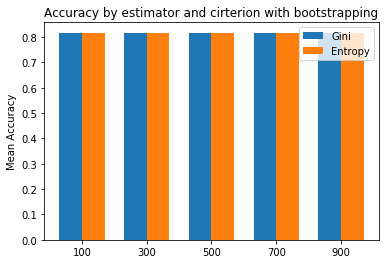

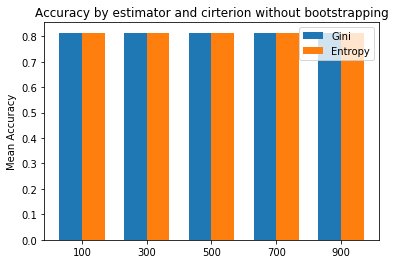

In [35]:
# Plotting the accuracy of hyper parameters 
import numpy as np

mean_accuracies = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params_combos = grid.cv_results_['params']

gt = {'means': [],
     'std': []}
gf = {'means': [],
     'std': []}
et = {'means': [],
     'std': []}
ef = {'means': [],
     'std': []}

for m, s, p, in zip(mean_accuracies, stds, params_combos):
    if p['criterion'] == 'gini' and p['bootstrap'] == True:
        gt['means'].append(m)
        gt['std'].append(s)
    if p['criterion'] == 'gini' and p['bootstrap'] == False:
        gf['means'].append(m)
        gf['std'].append(s)
    if p['criterion'] == 'entropy' and p['bootstrap'] == True:
        et['means'].append(m)
        et['std'].append(s)
    if p['criterion'] == 'entropy' and p['bootstrap'] == False:
        ef['means'].append(m)
        ef['std'].append(s)

x = np.arange(len(parameters['n_estimators']))
width = 0.35 

fig, ax = plt.subplots()
rects_gini = ax.bar(x - width/2, gt['means'], width, label='Gini')
rects_entropy = ax.bar(x + width/2, et['means'], width, label='Entropy')

ax.set_ylabel('Mean Accuracy')
ax.set_title('Accuracy by estimator and cirterion with bootstrapping')
ax.set_xticks(x)
ax.set_xticklabels(parameters['n_estimators'])
ax.legend()

fig, ax = plt.subplots()
rects_gini = ax.bar(x - width/2, gf['means'], width, label='Gini')
rects_entropy = ax.bar(x + width/2, ef['means'], width, label='Entropy')

ax.set_ylabel('Mean Accuracy')
ax.set_title('Accuracy by estimator and cirterion without bootstrapping')
ax.set_xticks(x)
ax.set_xticklabels(parameters['n_estimators'])
ax.legend()

## Random Forest (Gosia)

In [36]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


parameters = {'max_features':range(5,16), 'random_state':[0]}
rf = GridSearchCV(RandomForestClassifier(), parameters, cv=10, n_jobs=4)
rf.fit(X=X_train, y=y_train)
scores = rf.cv_results_
Rfmodel = rf.best_estimator_
print ('best accuracy and parameters are', rf.best_score_, rf.best_params_)

C:\Users\kknox\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


best accuracy and parameters are 0.8078666666666666 {'max_features': 5, 'random_state': 0}


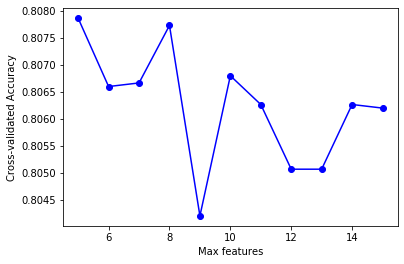

In [37]:
import matplotlib.pyplot as plt


plt.plot([x['max_features'] for x in scores['params']], scores['mean_test_score'], 'bo-')
plt.xlabel('Max features')
plt.ylabel('Cross-validated Accuracy')
plt.show()

In [38]:
predY = Rfmodel.predict(X_test)

In [39]:
predictions = pd.concat([pd.Series(y_test,name='True'), pd.Series(predY,name='PredictedClass')], axis=1)
predictions

,True,PredictedClass
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
14995,0,0
14996,0,0
14997,0,0
14998,1,1


In [40]:
CM = confusion_matrix(y_test, predY, labels=[0, 1])
CM

array([[11090,   592],
       [ 2329,   989]], dtype=int64)

In [41]:
tn, fp, fn, tp = CM.ravel()
(tn, fp, fn, tp)

recall=tp/(tp+fn)
recall

0.29807112718505124

In [42]:
# precision
prec=tp/(tp+fp)
prec

0.6255534471853258

In [43]:
# f1 
f1= 2*prec*recall / (prec+recall)
f1

0.403755868544601

## Bagging

In [44]:
from sklearn.ensemble import BaggingClassifier

bag = RandomForestClassifier()

parameters = {
    'n_estimators': [100,300,500,700,900],
    'bootstrap': [True, False]
}

grid = GridSearchCV(estimator=bag, param_grid=parameters, 
                    scoring='accuracy', cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

best_params = grid.best_params_
print(best_params)

{'bootstrap': True, 'n_estimators': 300}


In [46]:
best_bag = BaggingClassifier(n_estimators=best_params['n_estimators'], 
                                 bootstrap=best_params['bootstrap'])
accuracies = cross_val_score(estimator=best_rfc, X=X_train, y=y_train, cv=5)
print(acccuracies)

NameError: name 'acccuracies' is not defined

## Boosting

## SVM

In [ ]:
# less data because it's taking too much time

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# C = [0.1, 0.2, 0.5, 0.8, 1, 5]
# kernel = ['linear', 'poly', 'rbf', 'sigmoid']
# parameters = {'C' : C}
C = [0.01,0.1,0.5,1]
kernel = ['rbf']
parameters = {'kernel': kernel,'C': C, }

clf = GridSearchCV(SVC(gamma = 'auto'), parameters, cv=10, n_jobs=4)
clf.fit(X=X_train, y=y_train)
scores = clf.cv_results_
best_model = clf.best_estimator_
print ('best accuracy and parameters are', clf.best_score_, clf.best_params_)

In [ ]:
scores

In [ ]:
# rbf_scores = []
# linear_scores =[]
# for i in range(len(scores['params'])):
#     print(scores['params'][i])
#     print(scores['mean_test_score'][i])
#     if(scores['params'][i]['kernel'] == 'linear'):
#         linear_scores.append(scores['mean_test_score'][i])
#     if(scores['params'][i]['kernel'] == 'rbf'):
#         rbf_scores.append(scores['mean_test_score'][i])

In [ ]:
# rbf = [x['C'] for x in scores['params'] if x['kernel'] == 'rbf']
# linear = [x['C'] for x in scores['params'] if x['kernel'] == 'linear']

In [ ]:
import matplotlib.pyplot as plt

# plt.plot(rbf, rbf_scores, 'bo-')
# plt.plot(linear, linear_scores, 'rv--')
#plt.legend(['kernel: rbf','kernel: linear'])
plt.plot([x['C'] for x in scores['params']], scores['mean_test_score'], 'bo-')
plt.xlabel('C')
plt.ylabel('Cross-validated Accuracy')
plt.show()

In [ ]:
predY = best_model.predict(X_test[:1000])

In [ ]:
predictions = pd.concat([pd.Series(y_test[:1000],name='True'), pd.Series(predY,name='PredictedClass')], axis=1)
predictions

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test[:1000], predY, labels=[0, 1])
CM

In [ ]:
tn, fp, fn, tp = CM.ravel()
(tn, fp, fn, tp)

recall=tp/(tp+fn)
recall

In [ ]:
# precision
prec=tp/(tp+fp)
prec

In [ ]:
# f1 
f1= 2*prec*recall / (prec+recall)
f1